In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Librerias**

In [2]:
#Extracción de datos
import tweepy
import io

#Preprocesamiento
import pandas as pd
!pip install emoji
import emoji

#Funciones
import itertools

#Análisis de sentimientos
!pip install spanish_sentiment_analysis
from classifier import SentimentClassifier

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Estilo para que los gráficos tengan una mejor estética

#Quitar los warnings
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 185 kB 4.2 MB/s 
  Created wheel for emoji: filename=emoji-1.5.0-py3-none-any.whl size=187457 sha256=affa9df5b039ff64cc64018449e8dba8eacb294313fdad7b84f580f12df60dcc
  Stored in directory: /root/.cache/pip/wheels/db/b5/f6/b39abf14e94b3d6640613bbe630a66c10ccf7a12882d064fb5
Successfully built emoji
     |████████████████████████████████| 15.8 MB 149 kB/s 
     |████████████████████████████████| 1.2 MB 66.1 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Will download some functions from the nltk package if not found on the computer
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Extracción de de datos

In [ ]:
#Credenciales
consumer_key = "lBuVRO407LAPBQjm2T49oKhZy"
consumer_secret = "eCtBE8CXHQvcalXQiQTMzuqaYvmq3FghwyB7gn7fVa5hQC1XW0"
access_token = "1269456890121027584-HvEMfTmIvMA84wUF6vmSsOO9nfpUs8"
access_token_secret = "5KfGb0IG6hiqmcfmZMHP6kvTLgKtOTrDlpzmaueo2lqHs"
#Autenticación
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#Cabecera del CSV
#created_at -> Fecha de creación del tweet.
#user.screen_name -> Nombre de usuario del tweet.
#user.followers_count -> Cantidad de seguidores del usuario del tweet.
#user.location -> Ubicación del usuario del tweet.
#retweet_count -> Cantidad de retweets del tweet. 
#retweeted: True o False -> Ni idea de qué será.
#VERIFICAR SI ES RETWEET Y LUEGO:
#retweeted_status.user.screen_name -> Nombre de usuario del retweet.
#text | retweeted_status.text -> Texto completo del tweet o retweet.
fname="tweetsCopaAmericaJoel2.csv"
with io.open(fname, "a", encoding="utf-8") as f:
        f.write("created_at,user,followers_count,location,retweet_count,retweeted,userRT,text\n")
f.close()

In [ ]:
#Extraer datos

#Extraer tweets de cada línea que hay en el hashtags.txt
#Además deberíamos revisar cada una de esas teniendo en cuenta la ubicación. Pedirle a Robert que explique geolocation en tweepy.Cursor.
fname="tweetsCopaAmericaJoel2.csv"
i=1
for t in tweepy.Cursor(api.search, q="copaamerica2021 ecuador",since="2021-07-03",tweet_mode="extended").items(0):
    i+=1
    location=t.user.location
    if "," in location:
      if ", " in location:    
        location = location.replace(", ","-")
      else:
        location = location.replace(",",";").replace(" ","")
    line = str(t.created_at)+","+t.user.screen_name+","+str(t.user.followers_count)+","+location+","+str(t.retweet_count)+","+str(t.retweeted)
    if "retweeted_status" in t._json:
        full = t.retweeted_status.text.strip().replace("\n","").replace(",","")
        line +=","+t.retweeted_status.user.screen_name+",RT "+full+"\n"
    else:
        full = t.text.strip().replace("\n","").replace(",","")
        line +=",,"+full+"\n"
    with io.open(fname, "a", encoding="utf-8") as f:
        f.write(line)
    f.close()
    print(line)

2021-09-14 08:40:07,bigtickHK,30370,Sydney-New South Wales,42,False,MDTANVIRALOM1,RT expert #pdf #createspace #kindle #lulu #paperback #book #AamirKhan #বাংলাদেশ #England #MonstaX #Japan #pakistan #unitedstate #crash #sports #CopaAmerica2021 #treading #Messi #Argentina  #vs #Ecuador #product #goodmorning #goodnight  https://t.co/nnwkP3AtOw https://t.co/WDqkLcPt1S https://t.co/Z3g1ZH0EXO

2021-09-13 18:40:55,Smart_Reads,16776,New York City-USA,42,False,MDTANVIRALOM1,RT expert #pdf #createspace #kindle #lulu #paperback #book #AamirKhan #বাংলাদেশ #England #MonstaX #Japan #pakistan #unitedstate #crash #sports #CopaAmerica2021 #treading #Messi #Argentina  #vs #Ecuador #product #goodmorning #goodnight  https://t.co/nnwkP3AtOw https://t.co/WDqkLcPt1S https://t.co/Z3g1ZH0EXO

2021-09-11 03:10:02,ecuabot,7745,Ecuador,1,False,Alanmareco26,RT Podemos dar unos ejemplos:Partido contra #Ecuador cuartos de final de #CopaAmerica2021 sale a hablar #Gallardo: "No recibí un llamado de la Selección obvio 

# Preprocesamiento

In [3]:
#Importación de datos
df = pd.read_csv("/content/drive/MyDrive/preTAWS Projects/ProyectoGrupo1/Tokyo/tokyo_2020_tweets.csv")
df.head()

FileNotFoundError: ignored

In [ ]:
#Funciones

#Remover espacios
def removerEspacios(string):
    string=string.strip()  #remover espacios inicio y fin
    lista=string.split()
    string=" ".join(lista)
    return string

#funcion para remover RT(sale al inicio), recibe un str
def quitarRT(string):
    if string[0:2]=="RT":
        i0=string.find("RT")+2
        string=string[i0:]
        return string
    else:
        return string

#hacer minuscula
def minuscula(string):
    string=string.lower()
    return string

#Remover hashtags y menciones  #@ asd   @
def removerHTyM(string):
    lista=string.split()
    for word in lista:
        if word=="@":
          if len(lista)>lista.index(word)+1:
            del(lista[lista.index(word)+1])
          del(lista[lista.index(word)])
        elif word=='#':
          if len(lista)>lista.index(word)+1:
            del(lista[lista.index(word)+1])
          del(lista[lista.index(word)])
        elif word.find('#')==0:
          del(lista[lista.index(word)])
        elif word.find('@')==0:
          del(lista[lista.index(word)])
    string=" ".join(lista)
    return string

#Puntuacion
def puntuacion(string):
    lista=[",",".",":",";",'?','!','¿','¡','*','-','_','"','/','(',')','[',']','^','#','@']
    for signo in lista:
        string=string.replace(signo,"")
    return string

def puntuacion2(string):
  lista=string.split()
  letras=['dt','xq','rt','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
  for word in lista:
    for letra in letras:
      if word==letra:
        del(lista[lista.index(word)])
  string=' '.join(lista)
  return string

def numeros(cadena):
  numeros=['1','2','3','4','5','6','7','8','9','0']
  for letra in cadena:
    for numero in numeros:
      if letra==str(numero):
        cadena=cadena.replace(letra,'')
  return cadena

def tildes(string):
    string=string.replace("á",'a')
    string=string.replace("é",'e')
    string=string.replace('í','i')
    string=string.replace('ó','o')
    string=string.replace('ú','u')
    string=string.replace('ü','u')
    return string


def removerEmojis(string):
    return emoji.get_emoji_regexp().sub(r'', string)

def rmCharDuplicados(cadena):
    return ''.join(ch for ch, _ in itertools.groupby(cadena))

def removerHTPST(cadena):
  lista=cadena.split()
  for word in lista:
    if word.find('htpst')==0:
       del(lista[lista.index(word)])
  cadena=' '.join(lista)
  return cadena

def remove_stopwords(sentence):
    words=[ token for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words('spanish') ]
    return ' '.join(words)


def clasificador(score):
  if score>=0.51:
    return "positivo"
  elif score<=0.4:
    return "negativo"
  else:
    return "neutral"

def extraerFecha(fecha):
  return fecha.split()[0]
  
def estructuraFecha(fecha):
  estF = []
  if '/' in fecha:
    listaF = fecha.split("/")
    estF = [listaF[2]]+[listaF[0]]+[listaF[1]]
    return "-".join(estF)
  else:
    return fecha






In [ ]:
#Eliminar text nulos.
df = df[df["text"].isna()==False]

#Eliminar registros duplicados
df = df.drop_duplicates()

#Convertir a String para que funcione
df["text"]=df["text"].apply(str)

#Funciones aplicadas al DF.
df["text"]=df["text"].apply(lambda x:removerEspacios(x))
df["text"]=df["text"].apply(lambda x:quitarRT(x))
df["text"]=df["text"].apply(lambda x:minuscula(x))
df["text"]=df["text"].apply(lambda x:removerHTyM(x))
df["text"]=df["text"].apply(lambda x:puntuacion(x))
df["text"]=df["text"].apply(lambda x:tildes(x))
df["text"]=df["text"].apply(lambda x:removerEmojis(x))
df["text"]=df["text"].apply(lambda x:rmCharDuplicados(x))
df["text"]=df["text"].apply(lambda x:removerHTPST(x))
df["text"]=df["text"].apply(lambda x:puntuacion2(x))
df["text"]=df["text"].apply(lambda x:numeros(x))
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45,39,293,False,2021-07-24 10:59:49,let the party begin,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235,5,2969,False,2021-07-24 10:58:45,congratulations,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646,3,5,False,2021-07-24 10:58:17,big breaking now tokyo olympic update japan wo...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975,2724,36554,True,2021-07-24 10:57:56,q great britain finaly find way way pieterse ...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6,37,31,False,2021-07-24 10:52:51,al can think of every time watch the rings eve...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297004,1419947009851670529,RTÉ Sport,Ireland,RTÉ Sport - Irish and international sports cov...,2007-09-19 12:53:56,121097,1357,916,True,2021-07-27 09:05:23,robert dickson and sean wadilove have taken st...,['olympics'],TweetDeck,0.0,6.0,False
297005,1419947006924046336,for club and country,Soccer City,Thorns/KCNWSL/RLFC. Expect obnoxious game day ...,2019-03-30 08:16:25,8,116,1421,False,2021-07-27 09:05:22,fresh half lfg ladies tokyo,"['USAvAUS', 'Tokyo2020']",Twitter for iPhone,0.0,0.0,False
297006,1419947001102405633,Belgian Cats,Brussels,The Belgian National Team - Women's basketball,2010-05-11 10:28:27,5296,161,973,False,2021-07-27 09:05:21,it's close contest in our first olympic game a...,NaN,Twitter Web App,7.0,38.0,False
297007,1419946996895346689,IOC MEDIA,Lausanne. Switzerland,Keep updated with all the latest news from the...,2011-01-05 10:00:39,147657,712,624,True,2021-07-27 09:05:20,athletes from the ioc started their competiti...,['Tokyo2020'],Twitter Web App,7.0,11.0,False


In [ ]:
#Deteccion de idioma
!pip install langdetect
from langdetect import detect


#codigo de los idiomas
#af, ar, bg, bn, ca, cs, cy, da, de, el, en, es, et, fa, fi, fr, gu, he,
#hi, hr, hu, id, it, ja, kn, ko, lt, lv, mk, ml, mr, ne, nl, no, pa, pl,
#pt, ro, ru, sk, sl, so, sq, sv, sw, ta, te, th, tl, tr, uk, ur, vi, zh-cn, zh-tw
def idioma(cadena):
  if len(cadena)!=0:
    idioma=detect(cadena)
  return idioma



In [ ]:

df['idioma']=df['text'].apply(idioma)
df


LangDetectException: ignored

# Análisis de sentimientos

## Cálculo de scores

In [ ]:
cid = SentimentClassifier()
df["sentimiento"]=df["text"].apply(lambda x: cid.predict(x))
df

,created_at,user,followers_count,location,retweet_count,retweeted,userRT,full_text,sentimiento
0,2021-06-27 21:30:14,andicornio,474,Portoviejo,3,False,ecuadorfutbol,va gonzalo plata para el vs dixon aroyo damian...,0.515829
1,2021-06-27 20:10:37,luishcoronela,124,Cuenca - Ecuador,3,False,ecuadorfutbol,va gonzalo plata para el vs dixon aroyo damian...,0.515829
2,2021-06-27 20:08:01,christianfran44,62,Guayaquil,3,False,ecuadorfutbol,va gonzalo plata para el vs dixon aroyo damian...,0.515829
3,2021-06-27 20:06:36,ecuadorfutbol,95278,Ecuador,3,False,NaN,va gonzalo plata para el vs dixon aroyo damian...,0.515829
4,2021-06-23 20:56:55,Lokos_Xel_barce,1678,En todo el ecuador,1,False,NaN,mediocre y perdedor gonzalo plata ni a la banc...,0.020439
...,...,...,...,...,...,...,...,...,...
21381,6/27/2021 22:22,CarlosLuKs_,62,Guayaquil-Ecuador,26,False,CopaAmerica,brasil 1 1 ecuador ️ 60' eder militão 37' ange...,0.021597
21382,6/27/2021 22:22,Cesarvillalvaj,3860,Ecuador-Guayaquil,1,False,NaN,angel mena,0.046532
21383,6/27/2021 22:18,_JustSavic_,1200,Santiago-Chile,1,False,FueTodoBalon,gol de ecuadorangel mena con un gran derechazo...,0.006977
21384,6/27/2021 22:16,PradaRodolfo,1773,B/manga-P/cuesta,Barbosa.Col,2,False,golcaracol,0.541333


In [ ]:

df.to_csv("/content/drive/MyDrive/preTAWS Projects/ProyectoGrupo1/dfScores.csv", index = False)


### Análisis de resultados

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/preTAWS Projects/ProyectoGrupo1/dfScores.csv",index_col=0,parse_dates=True)

In [ ]:
def clasificador(score):
  if score>=0.51:
    return "positivo"
  elif score<=0.4:
    return "negativo"
  else:
    return "neutral"

df = df.rename(columns={'sentimiento':'score'}) #Cambie nombre de columna "sentimiento" a "score"
df['sentimiento']=df['score'].apply(clasificador)
df

### Valores medios

In [ ]:
#Pasar de horarios a datos medios horarios
df_sentimiento = df[["sentimiento"]]
df_dia = df_sentimiento.resample('d').mean()
df_dia_median = df_sentimiento.resample('d').median()

In [ ]:
#Pasar de horarios a datos medios mensuales
df_mes = df_sentimiento.resample('m').mean()


In [ ]:
#Pasar de horarios a datos medios anuales
df_anio = df_sentimiento.resample('y').mean()

### Visualización de datos

Text(0.5, 1.0, 'Poner título')

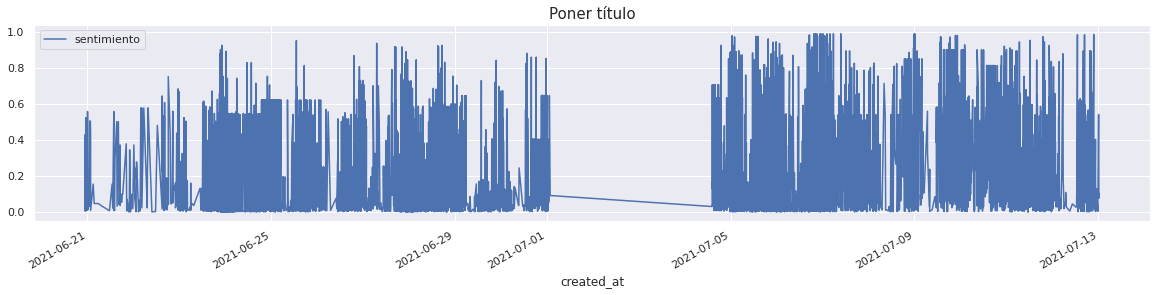

In [ ]:
#Cambiar el tamaño del gráfico
fix, ax = plt.subplots(figsize=(20,4))
df_sentimiento.plot(ax=ax)
plt.title("Poner título", size=15)

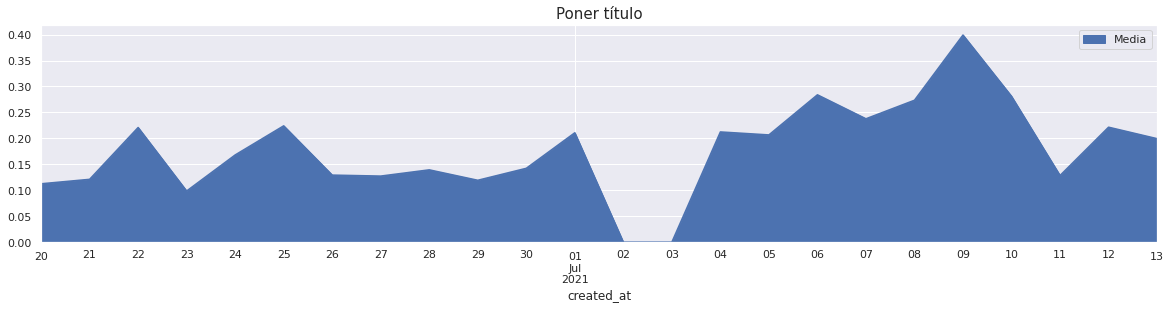

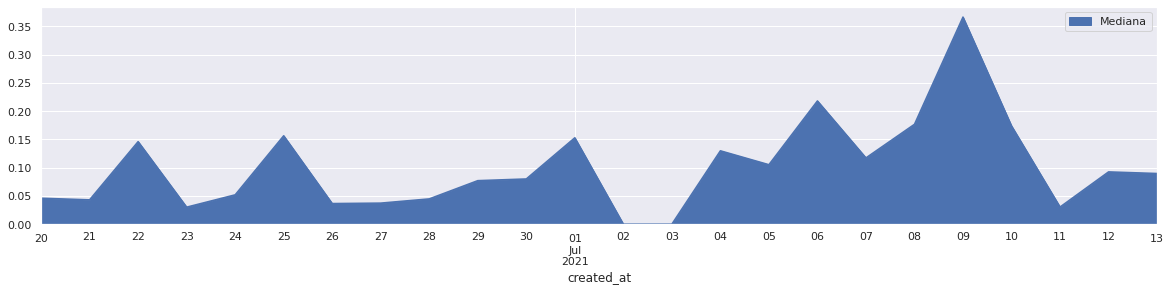

In [ ]:
fix, ax = plt.subplots(figsize=(20,4))
df_dia.rename(columns={"sentimiento": "Media"}).plot.area(ax=ax, label = "Mean")
plt.title("Poner título", size=15)
fix, ax = plt.subplots(figsize=(20,4))
df_dia_median.rename(columns={"sentimiento": "Mediana"}).plot.area(ax=ax, label = "Mean")


In [ ]:
# GRAFICO DE BARRAS CON LOS Positivos Negativos y Neutros Positivo: 
# Intentar un wordcloud
# Agregar un heatmap

In [ ]:

import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Para el wordcloud
def remove_stopwords(sentence):
   
    words=[ token for token in nltk.word_tokenize(sentence) if token.lower() not in stopwords.words('spanish') ]
    return " ".join(words)

In [ ]:
df["text"]=df["text"].apply(str)
df['wordcloud']=df['text'].apply(remove_stopwords)
df

NameError: ignored

In [ ]:
remove_stopwords(cadena)

'problema matrimonio acaba todas noches despues'

In [ ]:
lista = list(df["wordcloud"].apply(str).to_numpy())
x = " ".join(lista)

with open('/content/drive/MyDrive/preTAWS Projects/ProyectoGrupo1/texto.txt', 'w') as f:
    f.write(x)
f.close()

In [ ]:

df = pd.read_csv("/content/drive/MyDrive/preTAWS Projects/ProyectoGrupo1/dfScores.csv")
def clasificador(score):
  if score>=0.51:
    return "positivo"
  elif score<=0.4:
    return "negativo"
  else:
    return "neutral"

df = df.rename(columns={'sentimiento':'score'}) #Cambie nombre de columna "sentimiento" a "score"
df['sentimiento']=df['score'].apply(clasificador)
df

In [ ]:
def extraerFecha(fecha):
  return fecha.split()[0]
def estructuraFecha(fecha):
  estF = []
  if '/' in fecha:
    listaF = fecha.split("/")
    estF = [listaF[2]]+[listaF[0]]+[listaF[1]]
    return "-".join(estF)
  else:
    return fecha

df['created_at']=df['created_at'].apply(extraerFecha)
df['created_at']=df['created_at'].apply(estructuraFecha)
df


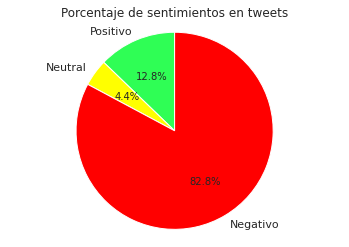

In [ ]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

labels = 'Positivo', 'Neutral', 'Negativo'

num_positivo = sum(df['sentimiento']=='positivo')
num_neutral = sum(df['sentimiento']=='neutral')
num_negativo = sum(df['sentimiento']=='negativo')

sizes = [num_positivo, num_neutral, num_negativo]
explode = (0, 0, 0)
colors = ('#2FFE55','yellow','red')
fig1, ax1 = plt.subplots()
plt.title("Porcentaje de sentimientos en tweets")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=False, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
df_hp = df[["created_at","sentimiento","score"]].groupby(["created_at","sentimiento"],as_index=False).count()
df_hp.head(6)

,created_at,sentimiento,score
0,2021-06-20,negativo,51
1,2021-06-20,neutral,5
2,2021-06-20,positivo,2
3,2021-06-21,negativo,53
4,2021-06-21,neutral,5
5,2021-06-21,positivo,3


In [ ]:
maximo = max(df_hp['score'])
df_hp[df_hp['score']0]



,created_at,sentimiento,score


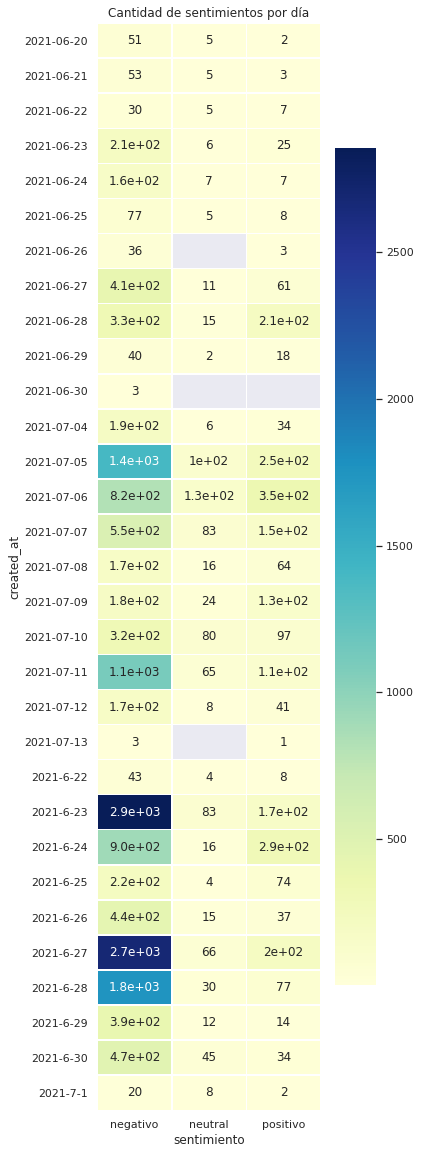

In [ ]:
import seaborn as sns
sns.set_theme()

df_pivot = df_hp.pivot("created_at", "sentimiento","score")

# Draw a heatmap with the numeric values in each cell

f, ax = plt.subplots(figsize=(5,20))
plt.title("Cantidad de sentimientos por día")
sns.heatmap(df_pivot, annot=True, linewidths=0.5, ax=ax,cmap="YlGnBu")